In [1]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

StatementMeta(, 19f535ae-1c69-455d-ae1c-1534636b3d41, 3, Finished, Available, Finished)

Cache file does not exists. resource=$ml, path=$/nfs4/tridenttokenlibrary/tokens/ml.token
failed to get ml token
Traceback (most recent call last):
  File "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/synapse/ml/fabric/token_utils.py", line 156, in _get_access_token_from_token_lib
    return PyTridentTokenLibrary.get_access_token_from_cache(resource)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/trident_token_library_wrapper.py", line 71, in get_access_token_from_cache
    raise IOError(err_msg)
OSError: Cache file does not exists. resource=$ml, path=$/nfs4/tridenttokenlibrary/tokens/ml.token


In [3]:
# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)  # Default figure size
plt.rcParams['font.size'] = 12            # Default font size

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 5, Finished, Available, Finished)

In [4]:
# Read sales data directly from the Bronze layer via Spark SQL
df_sales_spark = spark.sql("SELECT * FROM Raw_data.sales.raw_data")

# Quick overview of records and schema
print(f"Sales rows: {df_sales_spark.count()}")
df_sales_spark.printSchema()
display(df_sales_spark.limit(5))


StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 6, Finished, Available, Finished)

Sales rows: 8886058
root
 |-- _c0: string (nullable = true)
 |-- store_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- sales: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- stock: string (nullable = true)
 |-- price: string (nullable = true)
 |-- promo_type_1: string (nullable = true)
 |-- promo_bin_1: string (nullable = true)
 |-- promo_type_2: string (nullable = true)
 |-- promo_bin_2: string (nullable = true)
 |-- promo_discount_2: string (nullable = true)
 |-- promo_discount_type_2: string (nullable = true)



SynapseWidget(Synapse.DataFrame, e6f07dbb-6e4e-4894-9485-5f2b94335a7a)

# **Initial Data Overview on Sales**

In [5]:
# Basic descriptive stats
df_sales_spark.describe().show()

# Count of missing values per column
print("\nMissing values in sales:")
df_sales_spark.select([
    F.count(F.when(F.col(c).isNull(), c)).alias(c)
    for c in df_sales_spark.columns
]).show()

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 7, Finished, Available, Finished)

+-------+-----------------+--------+----------+----------+------------------+-----------------+------------------+------------------+------------+-----------+------------+-----------+------------------+---------------------+
|summary|              _c0|store_id|product_id|      date|             sales|          revenue|             stock|             price|promo_type_1|promo_bin_1|promo_type_2|promo_bin_2|  promo_discount_2|promo_discount_type_2|
+-------+-----------------+--------+----------+----------+------------------+-----------------+------------------+------------------+------------+-----------+------------+-----------+------------------+---------------------+
|  count|          8886058| 8886058|   8886058|   8886058|           8886058|          8886058|           8886058|           8886058|     8886058|    8886058|     8886058|    8886058|           8886058|              8886058|
|   mean|        4443029.5|    NULL|      NULL|      NULL|0.4734080445147479|2.285172950042493|16.00

In [6]:
data_pd=df_sales_spark.toPandas()

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 8, Finished, Available, Finished)

# **Univariate Analysis**

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 9, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


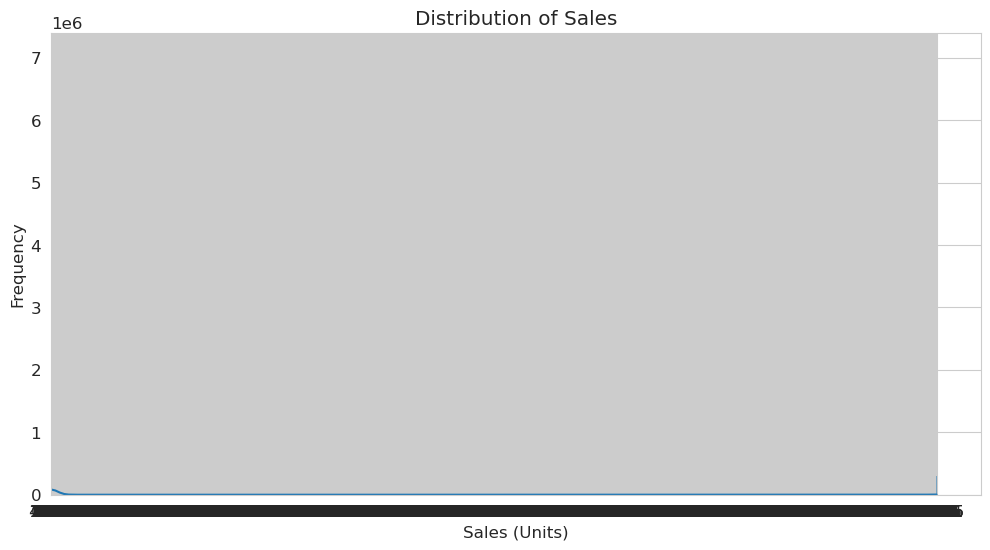

count     8886058
unique       5436
top             0
freq      7048907
Name: sales, dtype: object
Zero sales entries: 0 (0.00%)


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


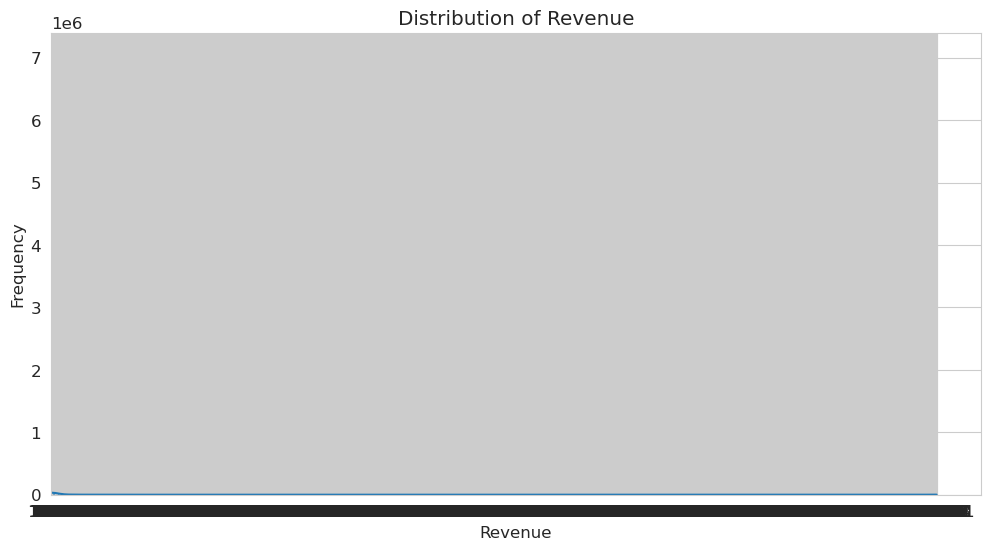

count     8886058
unique      12156
top             0
freq      7049979
Name: revenue, dtype: object


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


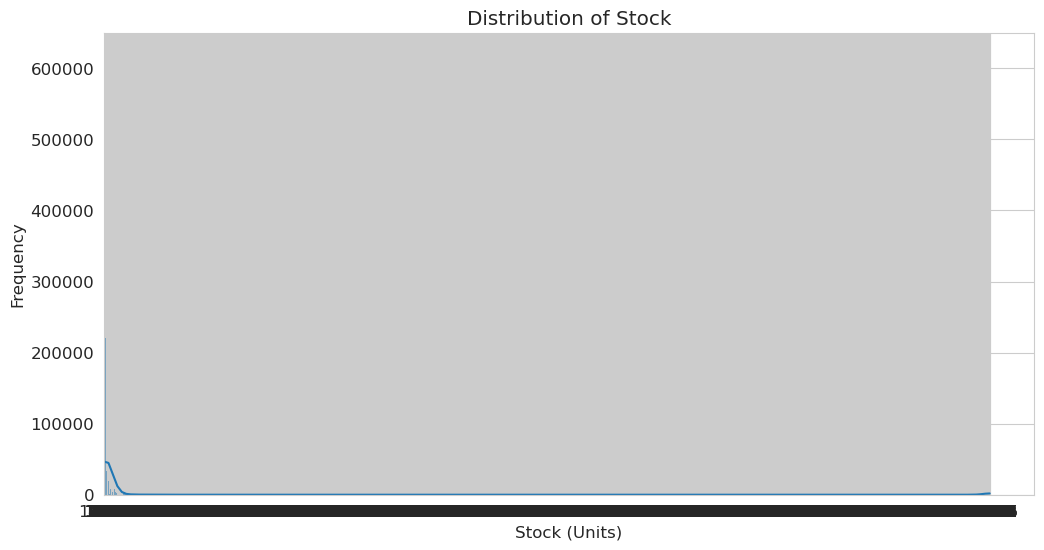

count     8886058
unique       9040
top             4
freq       619203
Name: stock, dtype: object
Zero stock entries: 0 (0.00%)


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


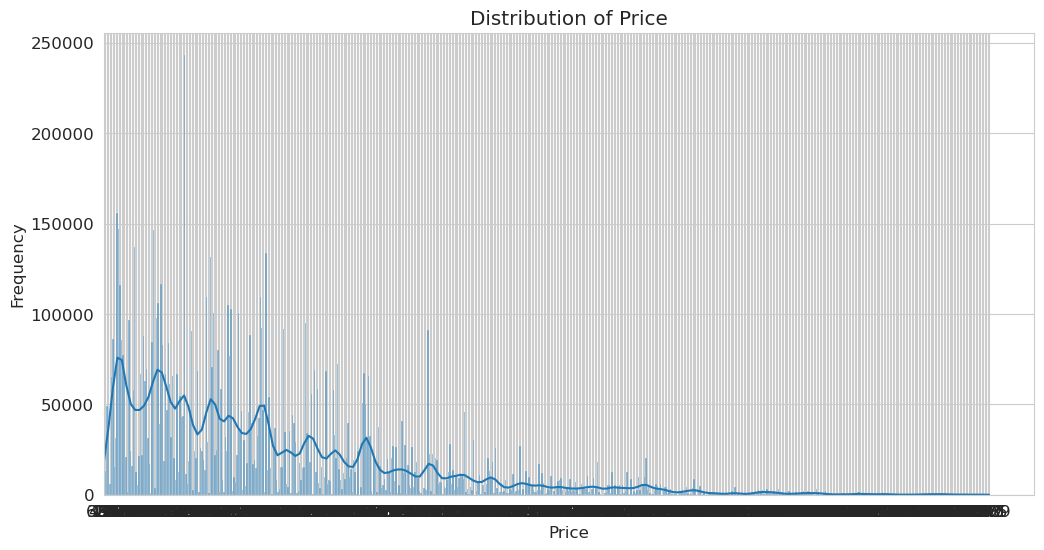

count     8886058
unique        607
top             1
freq       243419
Name: price, dtype: object

Value counts for promo_type_1:
promo_type_1
PR14    7653515
PR05     547253
PR10     213664
PR03     151863
PR06     124289
PR07      57419
PR12      40840
PR09      35752
PR17      32863
PR01      12618
PR11       5007
PR08       4176
PR04       3383
PR18       1878
PR16        912
PR13        607
PR15         19
Name: count, dtype: int64

Value counts for promo_type_2:
promo_type_2
PR03    8873337
PR02       7026
PR04       2892
PR01       2803
Name: count, dtype: int64

Value counts for promo_discount_type_2:
promo_discount_type_2
NA      8873337
PR01       3762
PR02       3648
PR04       2793
PR03       2518
Name: count, dtype: int64
Unique Stores: 63
Unique Products: 615


In [7]:
# Sales Distribution
plt.figure()
sns.histplot(data_pd['sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales (Units)')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.show()
print(data_pd['sales'].describe())
print(f"Zero sales entries: {(data_pd['sales']==0).sum()} ({(data_pd['sales']==0).mean()*100:.2f}%)")

# Revenue Distribution
plt.figure()
sns.histplot(data_pd['revenue'], bins=50, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.show()
print(data_pd['revenue'].describe())
print(f"Zero revenue entries: {(data_pd['revenue']==0).sum()} ({(data_pd['revenue']==0).mean()*100:.2f}%)")

# Stock Distribution
plt.figure()
sns.histplot(data_pd['stock'], bins=50, kde=True)
plt.title('Distribution of Stock')
plt.xlabel('Stock (Units)')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.show()
print(data_pd['stock'].describe())
print(f"Zero stock entries: {(data_pd['stock']==0).sum()} ({(data_pd['stock']==0).mean()*100:.2f}%)")

# Price Distribution
plt.figure()
sns.histplot(data_pd['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.show()
print(data_pd['price'].describe())

# Promo Type Counts
for promo_col in ['promo_type_1', 'promo_type_2', 'promo_discount_type_2']:
    if promo_col in data_pd:
        print(f"\nValue counts for {promo_col}:")
        print(data_pd[promo_col].value_counts(dropna=False))

# Unique Store and Product IDs
print(f"Unique Stores: {data_pd['store_id'].nunique()}")
print(f"Unique Products: {data_pd['product_id'].nunique()}")

please upload to lakehouse

## **Time Series Analysis**

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 10, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


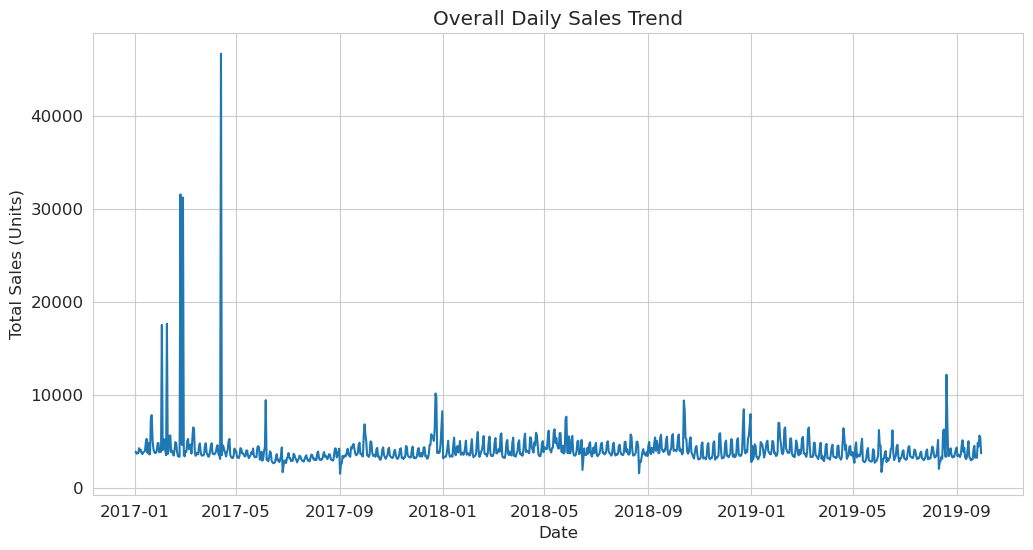

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


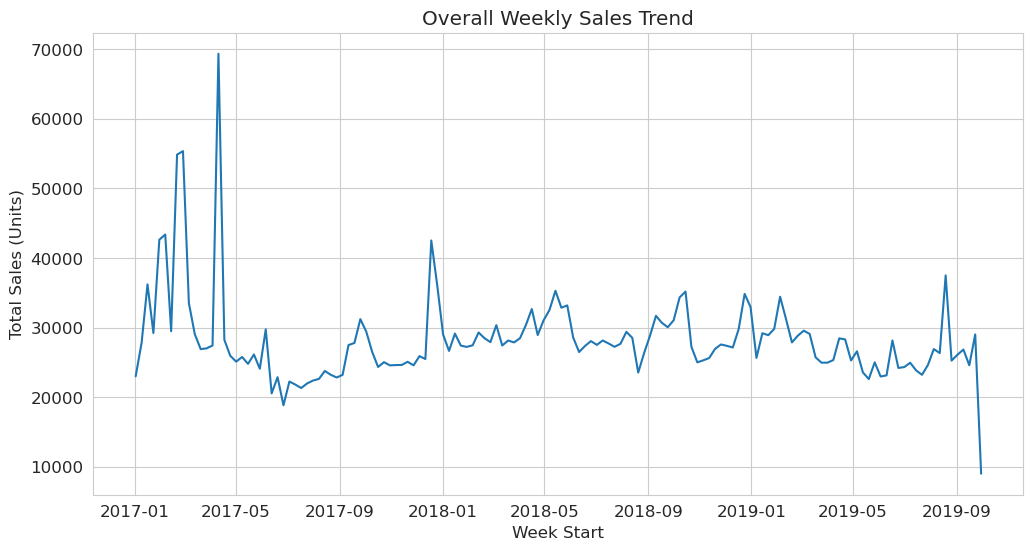

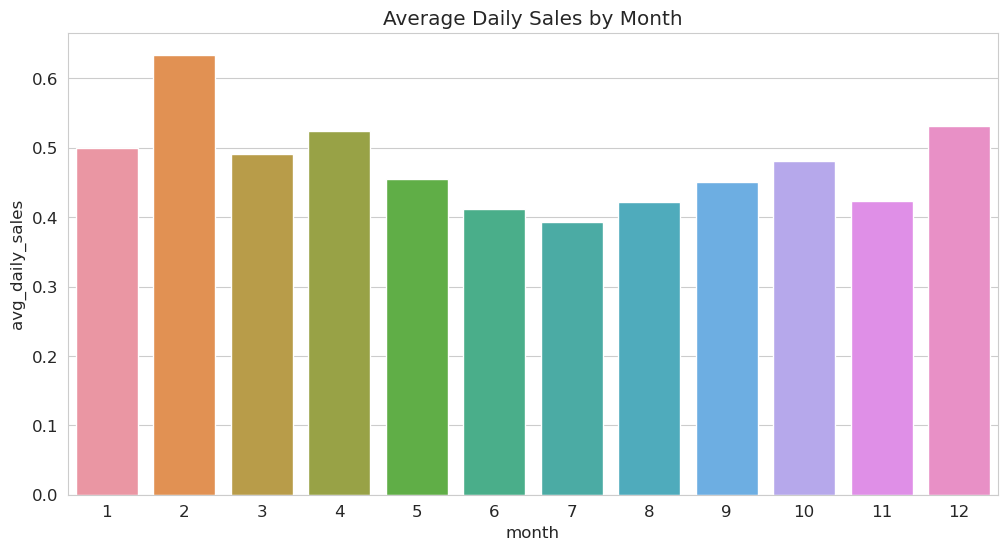

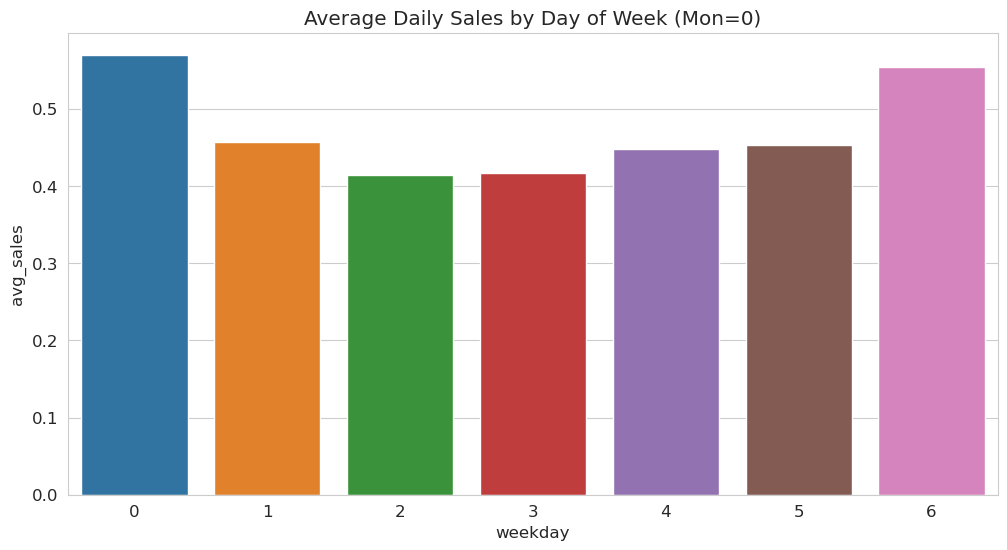

In [8]:
# Ensure date is datetime
df_ts = df_sales_spark.withColumn('date', F.to_date('date'))

# Daily overall sales trend
daily_sales = df_ts.groupBy('date').agg(F.sum('sales').alias('total_sales')).orderBy('date')
daily_pd = daily_sales.toPandas()

plt.figure()
sns.lineplot(data=daily_pd, x='date', y='total_sales')
plt.title('Overall Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (Units)')
plt.show()

# Weekly overall sales (Monday start)
df_week = df_ts.withColumn('week_start', F.date_sub('date', F.dayofweek('date')-2))
weekly_sales = df_week.groupBy('week_start').agg(F.sum('sales').alias('weekly_sales')).orderBy('week_start')
weekly_pd = weekly_sales.toPandas()

plt.figure()
sns.lineplot(data=weekly_pd, x='week_start', y='weekly_sales')
plt.title('Overall Weekly Sales Trend')
plt.xlabel('Week Start')
plt.ylabel('Total Sales (Units)')
plt.show()

# Seasonality: Month and Day of Week
season_pd = df_ts.withColumn('month', F.month('date')).groupBy('month').agg(F.avg('sales').alias('avg_daily_sales')).orderBy('month').toPandas()
plt.figure()
sns.barplot(data=season_pd, x='month', y='avg_daily_sales')
plt.title('Average Daily Sales by Month')
plt.show()

weekday_pd = df_ts.withColumn('weekday', F.dayofweek('date')-1).groupBy('weekday').agg(F.avg('sales').alias('avg_sales')).orderBy('weekday').toPandas()
plt.figure()
sns.barplot(data=weekday_pd, x='weekday', y='avg_sales')
plt.title('Average Daily Sales by Day of Week (Mon=0)')
plt.show()

## **Store & Product Level Analysis**

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 11, Finished, Available, Finished)

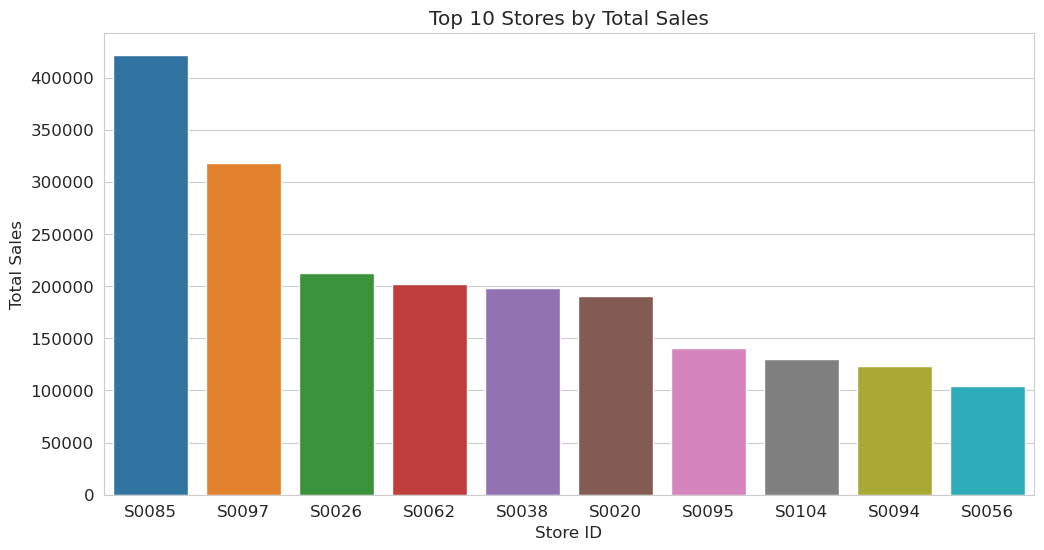

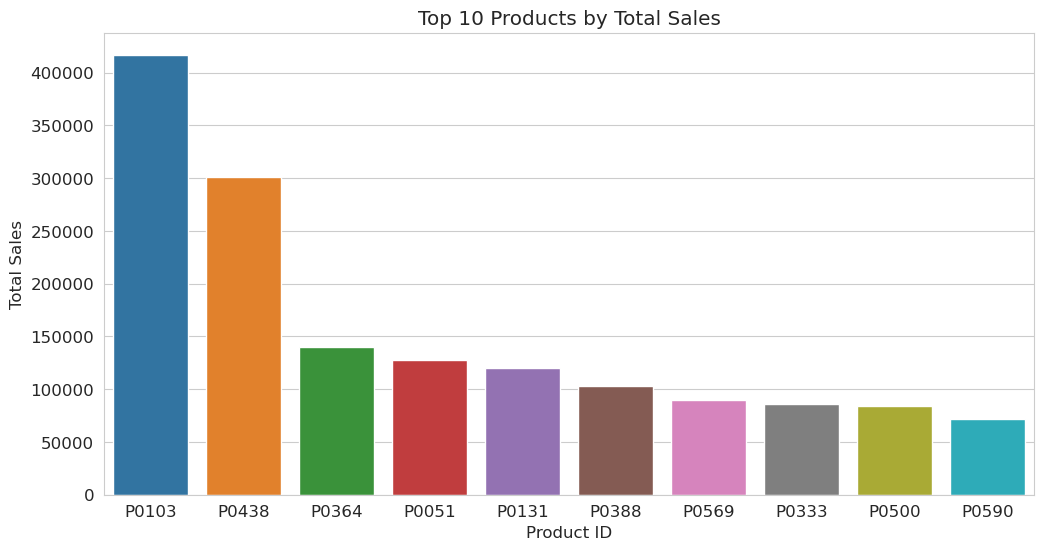

In [9]:
# Top 10 Stores by Total Sales
top_stores = df_sales_spark.groupBy('store_id').agg(F.sum('sales').alias('total_sales')).orderBy(F.desc('total_sales')).limit(10).toPandas()
plt.figure()
sns.barplot(data=top_stores, x='store_id', y='total_sales')
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.show()

# Top 10 Products by Total Sales
top_products = df_sales_spark.groupBy('product_id').agg(F.sum('sales').alias('total_sales')).orderBy(F.desc('total_sales')).limit(10).toPandas()
plt.figure()
sns.barplot(data=top_products, x='product_id', y='total_sales')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()

## **Data Quality Checks**

In [10]:
# Duplicate records (date, product_id)
dups = df_sales_spark.groupBy('date','product_id').count().where(F.col('count')>1)
display(dups)

# Negative sales entries
neg_sales = df_sales_spark.where(F.col('sales') < 0)
print(f"Rows with negative sales: {neg_sales.count()}")
display(neg_sales.limit(10))

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 12, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, b9d08372-4158-4f63-8485-f671e4c5eb6e)

Rows with negative sales: 0


SynapseWidget(Synapse.DataFrame, f625509d-db47-4b2e-a53f-df5f9bb87f54)

## **Distribution of Store Size by Total Sales**

In [11]:
df_cities_spark = spark.sql("SELECT * FROM Raw_data.cities.raw_data")

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 13, Finished, Available, Finished)

In [12]:
df_cities_spark = df_cities_spark.withColumn('store_size', F.col('store_size').cast('double'))


StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 14, Finished, Available, Finished)

In [13]:
joined = (
    df_sales_spark
    .join(df_cities_spark, on="store_id", how="left")
    # cast store_size from string to numeric
    .withColumn('store_size', F.col('store_size').cast('double'))  # or .cast('int') if you prefer integer
)
print(f"Joined rows: {joined.count()}")
joined.printSchema()

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 15, Finished, Available, Finished)

Joined rows: 8886058
root
 |-- store_id: string (nullable = true)
 |-- _c0: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- sales: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- stock: string (nullable = true)
 |-- price: string (nullable = true)
 |-- promo_type_1: string (nullable = true)
 |-- promo_bin_1: string (nullable = true)
 |-- promo_type_2: string (nullable = true)
 |-- promo_bin_2: string (nullable = true)
 |-- promo_discount_2: string (nullable = true)
 |-- promo_discount_type_2: string (nullable = true)
 |-- storetype_id: string (nullable = true)
 |-- store_size: double (nullable = true)
 |-- city_id_old: string (nullable = true)
 |-- country_id: string (nullable = true)
 |-- city_code: string (nullable = true)



In [14]:
# Aggregate total and average sales per store_size
sales_by_size = (
    joined
    .groupBy("store_size")
    .agg(
        F.sum("sales").alias("total_sales"),
        F.avg("sales").alias("avg_sales_per_record"),
        F.count("sales").alias("num_records")
    )
    .orderBy("store_size")
)

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 16, Finished, Available, Finished)

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 17, Finished, Available, Finished)

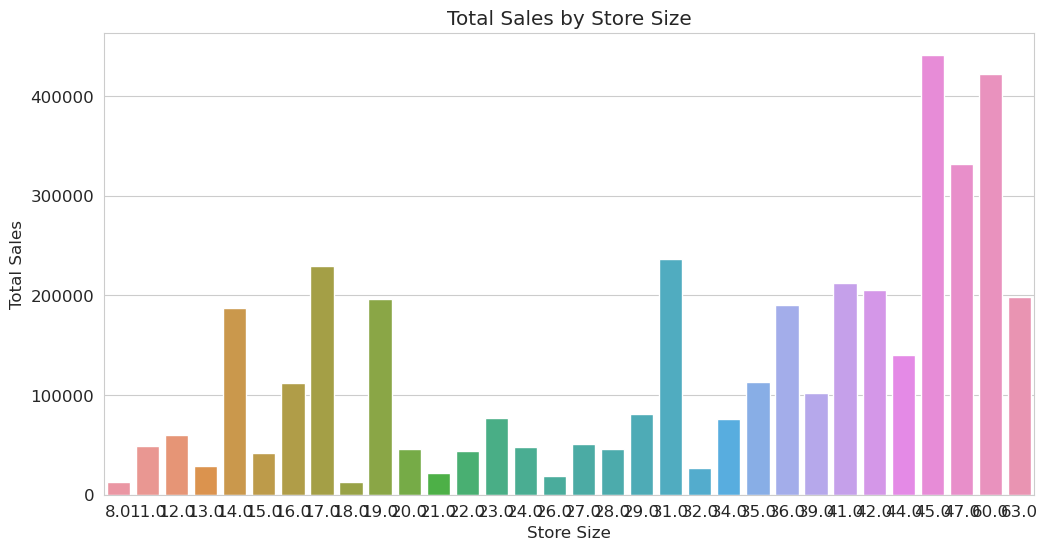

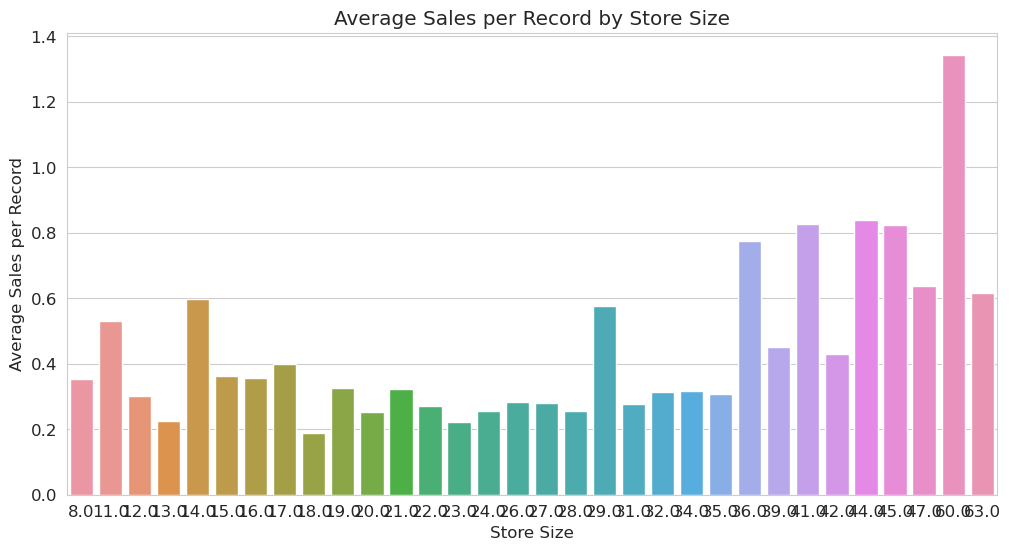

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


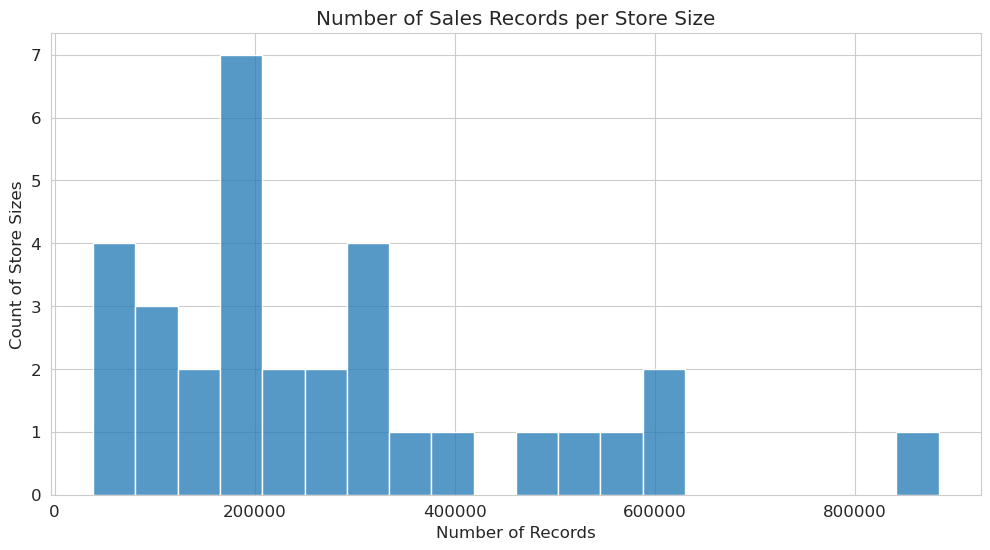

In [15]:
# Convert to pandas for plotting
sales_by_size_pd = sales_by_size.toPandas()

# Barplot: Total Sales by Store Size
plt.figure()
sns.barplot(data=sales_by_size_pd, x='store_size', y='total_sales')
plt.title('Total Sales by Store Size')
plt.xlabel('Store Size')
plt.ylabel('Total Sales')
plt.show()

# Barplot: Average Sales per Record by Store Size
plt.figure()
sns.barplot(data=sales_by_size_pd, x='store_size', y='avg_sales_per_record')
plt.title('Average Sales per Record by Store Size')
plt.xlabel('Store Size')
plt.ylabel('Average Sales per Record')
plt.show()

# Histogram: Number of Sales Records by Store Size
plt.figure()
sns.histplot(data=sales_by_size_pd, x='num_records', bins=20)
plt.title('Number of Sales Records per Store Size')
plt.xlabel('Number of Records')
plt.ylabel('Count of Store Sizes')
plt.show()

In [16]:
print("Store Size Distribution Metrics:")
print(sales_by_size_pd.describe())

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 18, Finished, Available, Finished)

Store Size Distribution Metrics:
       store_size    total_sales  avg_sales_per_record    num_records
count   32.000000      32.000000             32.000000      32.000000
mean    28.500000  126988.186969              0.447141  277689.312500
std     13.893605  114758.198411              0.252856  195791.954293
min      8.000000   12506.855000              0.186926   38579.000000
25%     17.750000   45043.710000              0.278832  143416.250000
50%     26.500000   79348.757500              0.340116  219216.000000
75%     36.750000  197110.543000              0.580939  340929.500000
max     63.000000  441418.625000              1.343281  883817.000000


## **Grouping by Store Size**

In [17]:
quantiles = df_cities_spark.approxQuantile('store_size', [0.25, 0.5, 0.75], 0.01)
q1, q2, q3 = quantiles
print(f"Store size quartiles: 25%={q1}, 50%={q2}, 75%={q3}")

# Create size group column
joined_grouped = joined.withColumn(
    'size_group',
    F.when(F.col('store_size') <= q1, 'Small')
     .when((F.col('store_size') > q1) & (F.col('store_size') <= q2), 'Medium')
     .when((F.col('store_size') > q2) & (F.col('store_size') <= q3), 'Large')
     .otherwise('Extra Large')
)

# Aggregate metrics by size_group
sales_by_group = (
    joined_grouped
    .groupBy('size_group')
    .agg(
        F.sum('sales').alias('total_sales'),
        F.avg('sales').alias('avg_sales_per_record'),
        F.count('sales').alias('num_records')
    )
    .orderBy(F.when(F.col('size_group') == 'Small', 1)
                 .when(F.col('size_group') == 'Medium', 2)
                 .when(F.col('size_group') == 'Large', 3)
                 .otherwise(4))
)


StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 19, Finished, Available, Finished)

Store size quartiles: 25%=15.0, 50%=19.0, 75%=31.0


StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 20, Finished, Available, Finished)

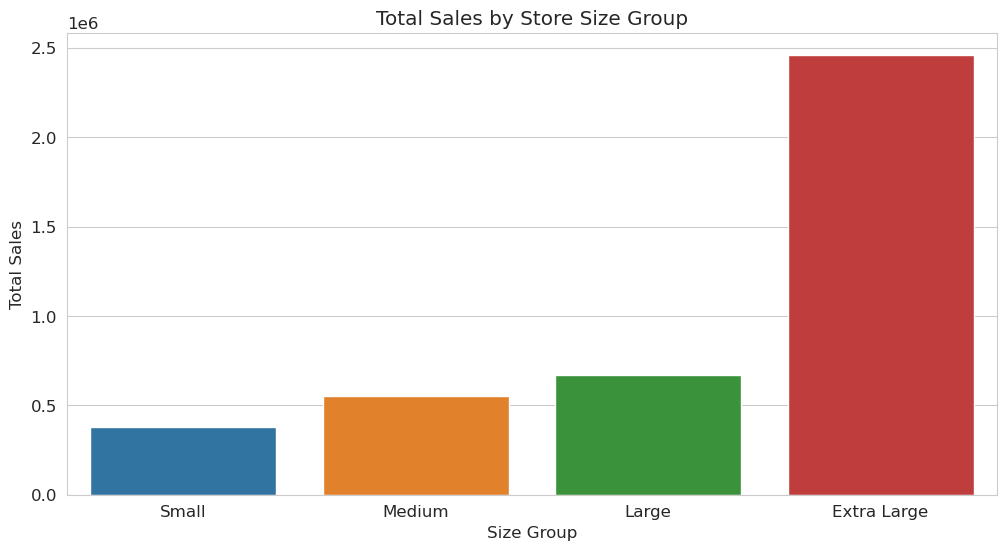

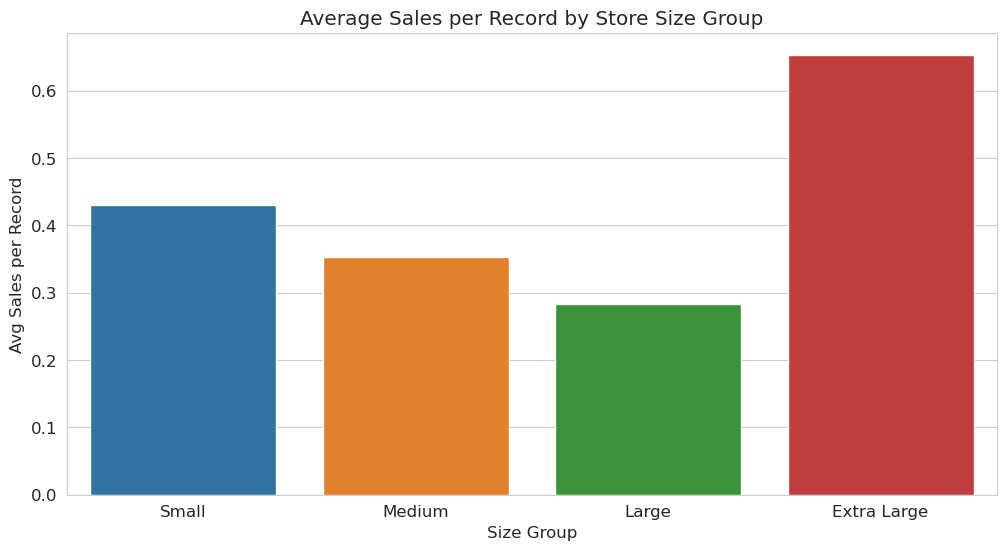

In [18]:
# Convert to pandas
sales_by_group_pd = sales_by_group.toPandas()

# Plot grouped metrics
groups = ['Small','Medium','Large','Extra Large']
plt.figure()
sns.barplot(data=sales_by_group_pd, x='size_group', y='total_sales', order=groups)
plt.title('Total Sales by Store Size Group')
plt.xlabel('Size Group')
plt.ylabel('Total Sales')
plt.show()

plt.figure()
sns.barplot(data=sales_by_group_pd, x='size_group', y='avg_sales_per_record', order=groups)
plt.title('Average Sales per Record by Store Size Group')
plt.xlabel('Size Group')
plt.ylabel('Avg Sales per Record')
plt.show()

In [19]:
print("Metrics by Store Size Group:")
print(sales_by_group_pd)
print("\nDistribution of store counts by group:")
print(joined_grouped.select('size_group','store_id').distinct()
      .groupBy('size_group').count().orderBy('size_group').show())

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 21, Finished, Available, Finished)

Metrics by Store Size Group:
    size_group  total_sales  avg_sales_per_record  num_records
0        Small   380202.350              0.429866       911565
1       Medium   550946.044              0.353092      1611594
2        Large   670824.436              0.282835      2458977
3  Extra Large  2461649.153              0.653449      3903922

Distribution of store counts by group:
+-----------+-----+
| size_group|count|
+-----------+-----+
|Extra Large|   16|
|      Large|   16|
|     Medium|   15|
|      Small|   16|
+-----------+-----+

None


## **Sales per Store within Each Size Group**

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 22, Finished, Available, Finished)

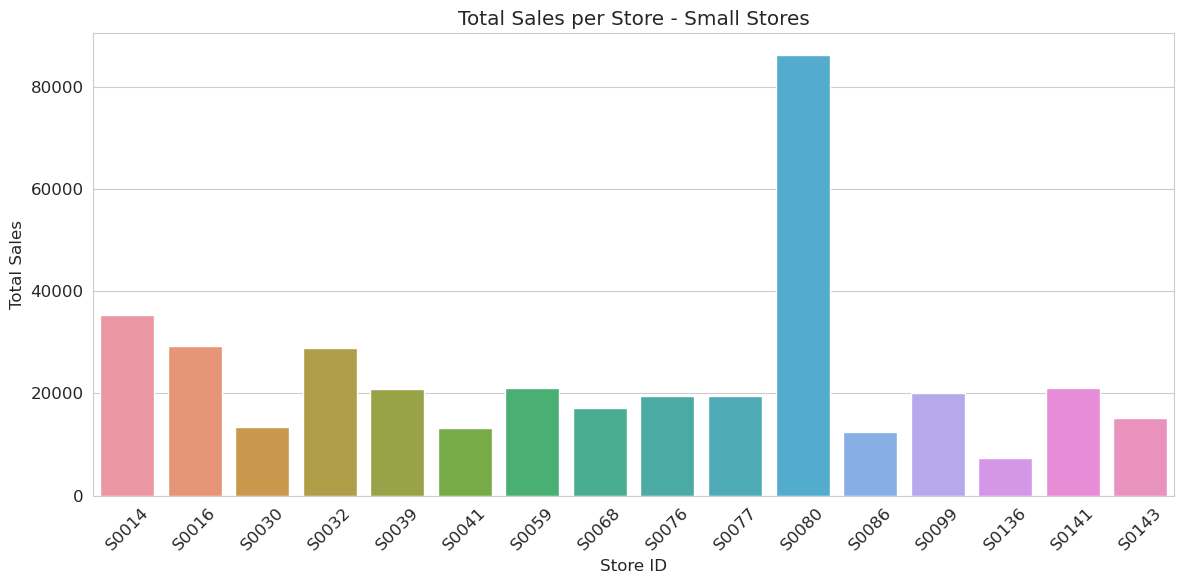

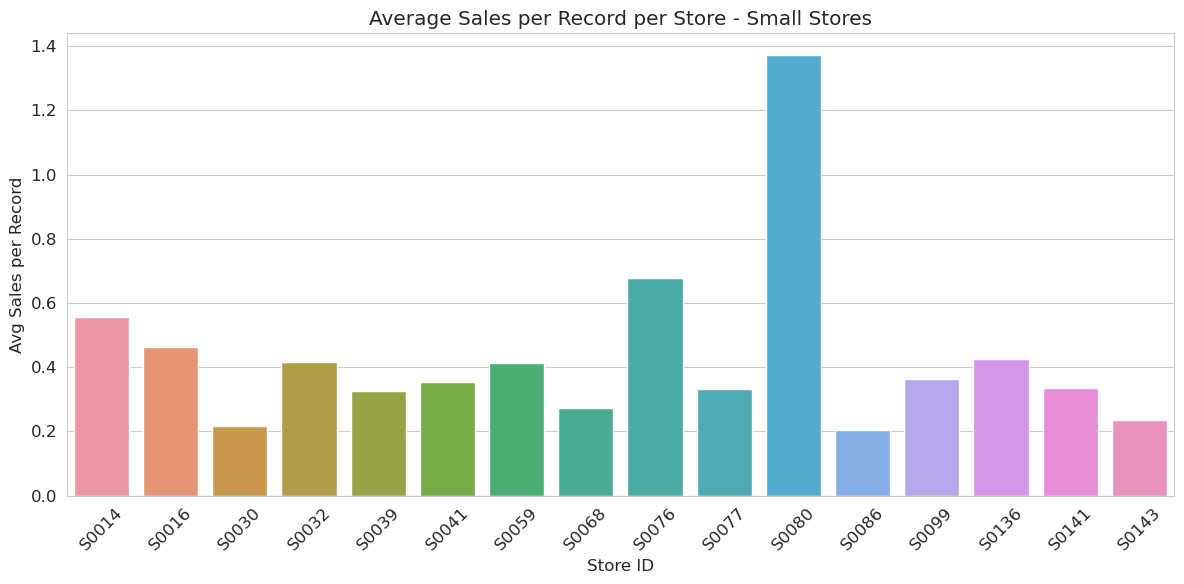

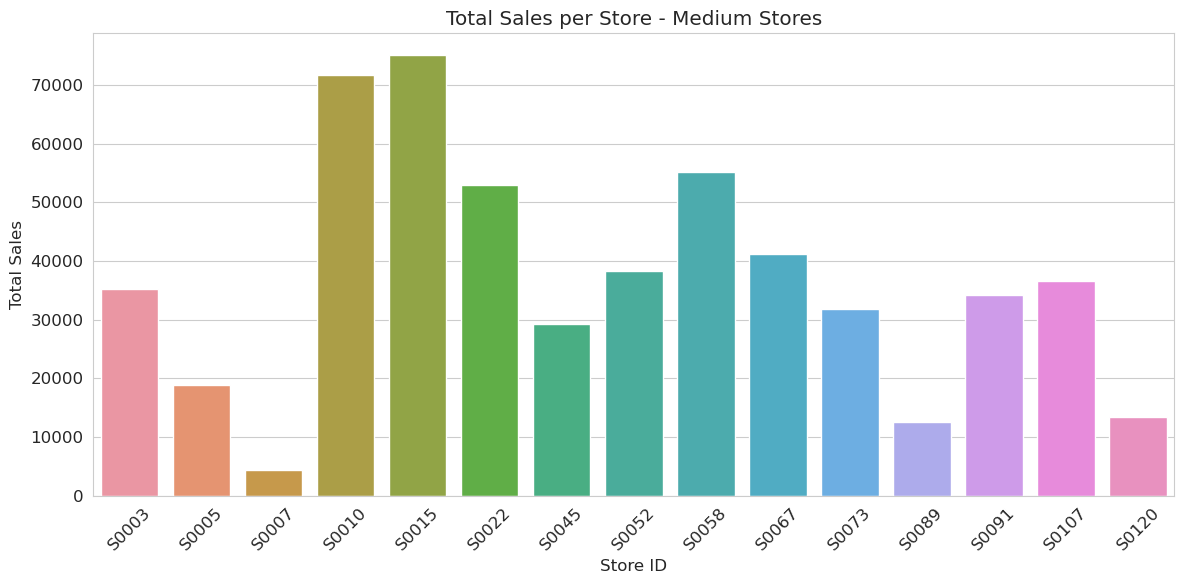

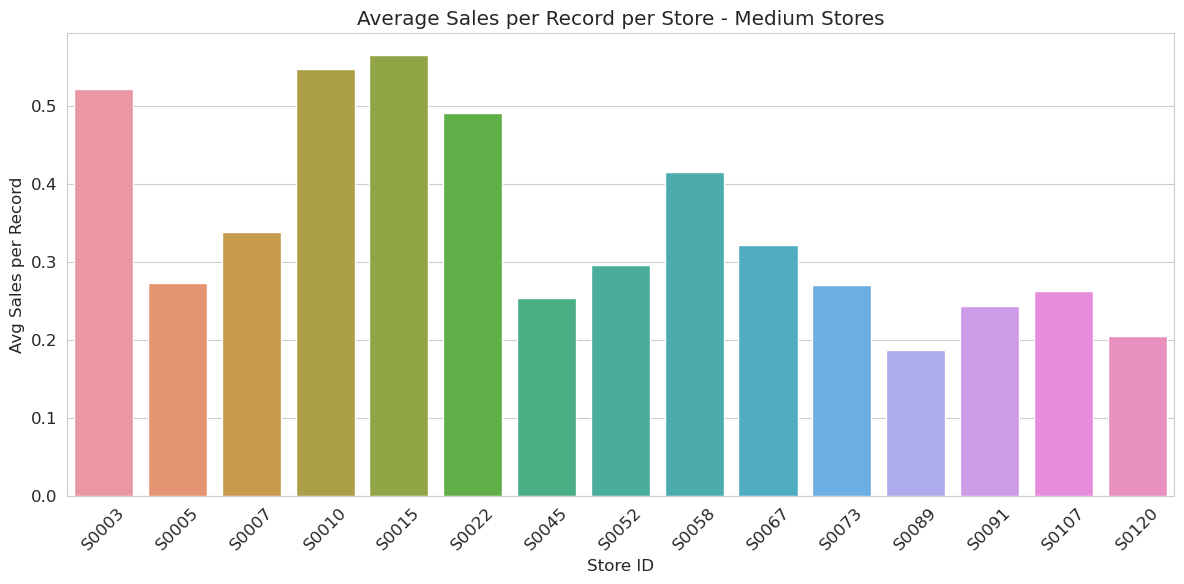

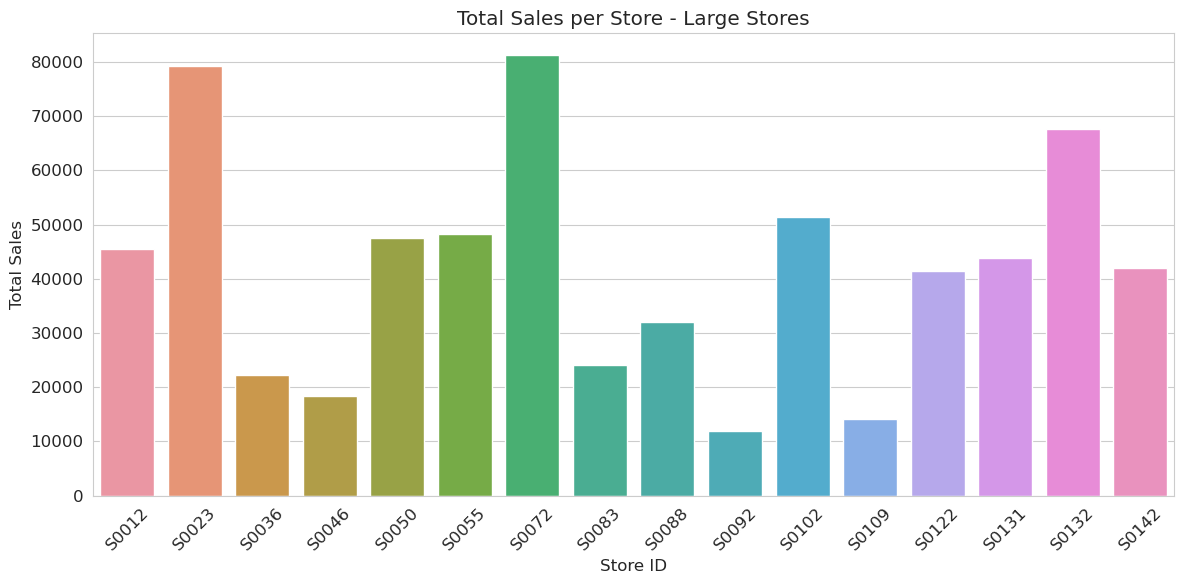

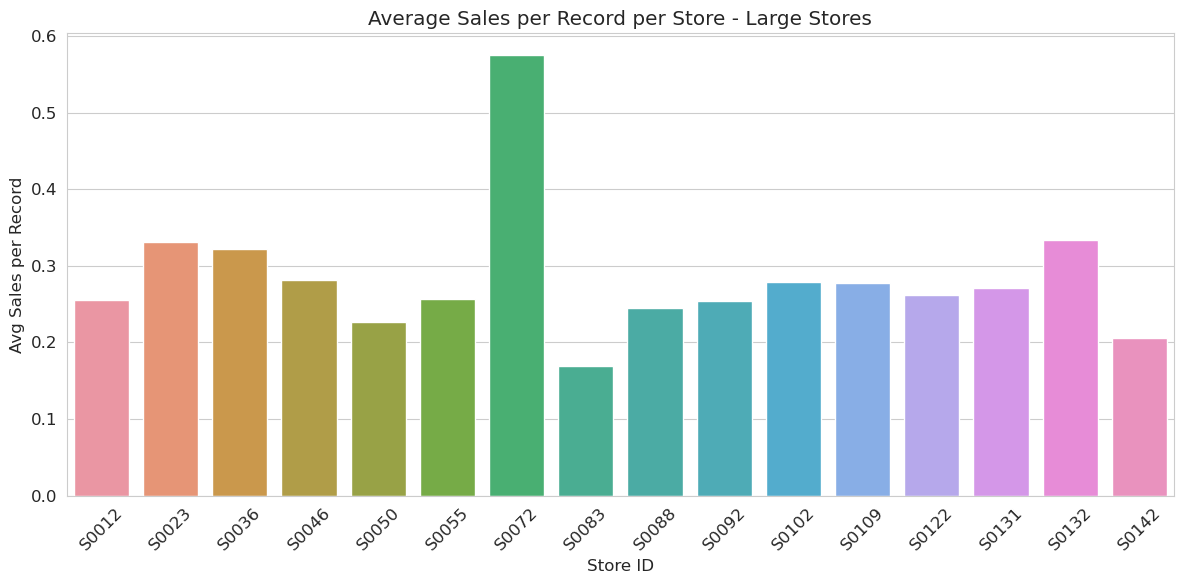

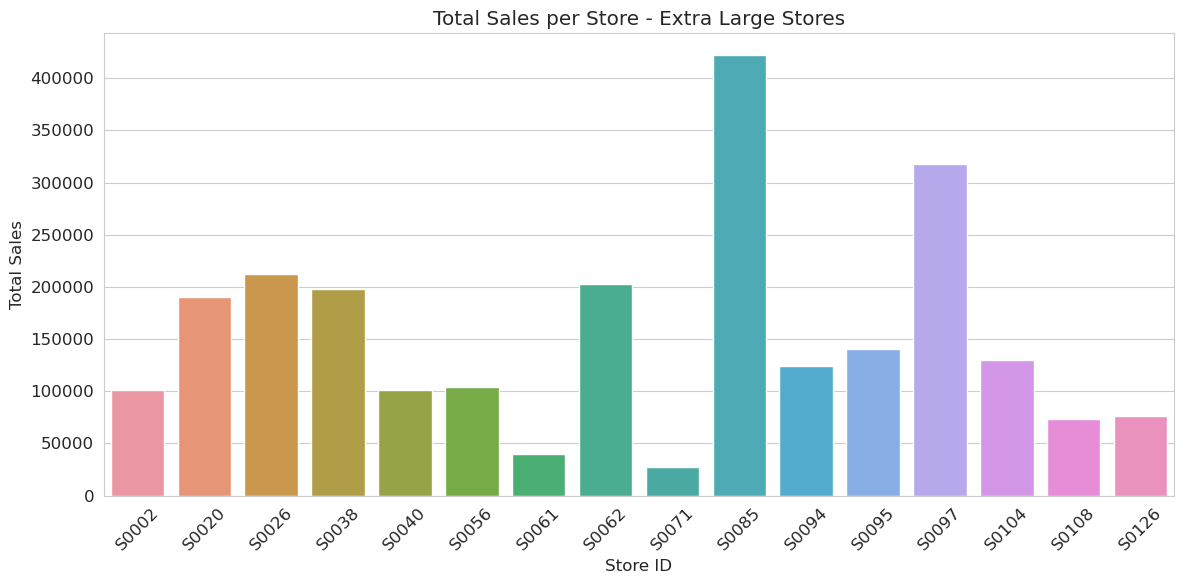

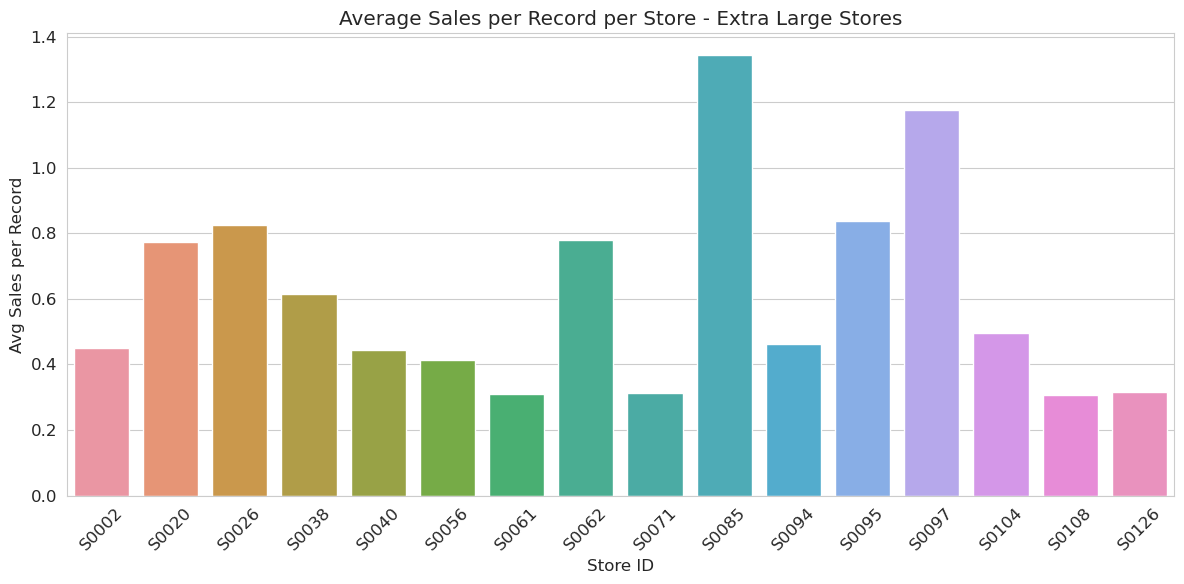

In [20]:
# Calculate metrics per store within each size group
sales_per_store = (
    joined_grouped
    .groupBy('size_group','store_id')
    .agg(
        F.sum('sales').alias('total_sales'),
        F.avg('sales').alias('avg_sales_per_record')
    )
    .orderBy('size_group','store_id')
)
# Convert to pandas for plotting
sales_per_store_pd = sales_per_store.toPandas()

# Plotting: one barplot per size group
groups = ['Small','Medium','Large','Extra Large']
for group in groups:
    df_group = sales_per_store_pd[sales_per_store_pd['size_group'] == group]
    # Total Sales per Store
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_group, x='store_id', y='total_sales')
    plt.title(f'Total Sales per Store - {group} Stores')
    plt.xlabel('Store ID')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Average Sales per Record per Store
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_group, x='store_id', y='avg_sales_per_record')
    plt.title(f'Average Sales per Record per Store - {group} Stores')
    plt.xlabel('Store ID')
    plt.ylabel('Avg Sales per Record')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [21]:
# 2) Detailed describe() for each size_group
for grp in ['Small', 'Medium', 'Large', 'Extra Large']:
    print(f"\n--- Detailed stats for {grp} stores ---")
    sales_per_store \
      .filter(F.col('size_group') == grp) \
      .select('total_sales') \
      .describe() \
      .show()

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 23, Finished, Available, Finished)


--- Detailed stats for Small stores ---
+-------+------------------+
|summary|       total_sales|
+-------+------------------+
|  count|                16|
|   mean|23762.646875000002|
| stddev|18059.526314311137|
|    min|           7308.35|
|    max| 86162.98500000002|
+-------+------------------+


--- Detailed stats for Medium stores ---
+-------+------------------+
|summary|       total_sales|
+-------+------------------+
|  count|                15|
|   mean| 36729.73626666667|
| stddev|20538.162980428442|
|    min|            4388.0|
|    max|         75076.427|
+-------+------------------+


--- Detailed stats for Large stores ---
+-------+------------------+
|summary|       total_sales|
+-------+------------------+
|  count|                16|
|   mean|       41926.52725|
| stddev|21298.814469632896|
|    min|         11923.691|
|    max| 81245.67899999999|
+-------+------------------+


--- Detailed stats for Extra Large stores ---
+-------+------------------+
|summary|     

## **Grouping by Total Sales**


In [22]:
# Read sales data directly from the Bronze layer via Spark SQL
df_sales_spark = spark.sql("SELECT * FROM Raw_data.sales.raw_data")
df_sales_spark

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 24, Finished, Available, Finished)

DataFrame[_c0: string, store_id: string, product_id: string, date: string, sales: string, revenue: string, stock: string, price: string, promo_type_1: string, promo_bin_1: string, promo_type_2: string, promo_bin_2: string, promo_discount_2: string, promo_discount_type_2: string]

In [23]:
# 1) Cast your sales column to a numeric type (if it’s currently a string)
df2 = df_sales_spark.withColumn('sales', F.col('sales').cast('double'))

# 2) Compute total sales per store
stores = (
    df2
    .groupBy('store_id')
    .agg(F.sum('sales').alias('total_sales'))
)

# 3) Compute the 25th, 50th, 75th percentiles of total_sales
q1, q2, q3 = stores.approxQuantile('total_sales', [0.25, 0.5, 0.75], 0.01)
print(f"Total Sales quartiles: 25%={q1}, 50%={q2}, 75%={q3}")

# 4) Assign size‐group based on those quantiles
stores_with_size = stores.withColumn(
    'size_group',
    F.when(F.col('total_sales') <= q1,      'Small Sellers')
     .when((F.col('total_sales') > q1)  & (F.col('total_sales') <= q2), 'Medium Sellers')
     .when((F.col('total_sales') > q2)  & (F.col('total_sales') <= q3),  'Large Sellers')
     .otherwise('Extra Large')
)

stores_with_size.head(50)

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 25, Finished, Available, Finished)

Total Sales quartiles: 25%=19562.0, 50%=36667.79500000001, 75%=75076.427


[Row(store_id='S0010', total_sales=71782.18000000002, size_group='Large Sellers'),
 Row(store_id='S0015', total_sales=75076.427, size_group='Large Sellers'),
 Row(store_id='S0016', total_sales=29177.03500000001, size_group='Medium Sellers'),
 Row(store_id='S0020', total_sales=190410.25599999994, size_group='Extra Large'),
 Row(store_id='S0003', total_sales=35160.17, size_group='Medium Sellers'),
 Row(store_id='S0005', total_sales=18848.211, size_group='Small Sellers'),
 Row(store_id='S0002', total_sales=101592.29999999996, size_group='Extra Large'),
 Row(store_id='S0012', total_sales=45449.28000000001, size_group='Large Sellers'),
 Row(store_id='S0014', total_sales=35400.375000000015, size_group='Medium Sellers'),
 Row(store_id='S0007', total_sales=4388.0, size_group='Small Sellers'),
 Row(store_id='S0059', total_sales=20962.53, size_group='Medium Sellers'),
 Row(store_id='S0062', total_sales=202347.67599999974, size_group='Extra Large'),
 Row(store_id='S0061', total_sales=39727.099999

In [24]:
# 1) Compute aggregate stats across size groups
group_stats = (
    stores_with_size
    .groupBy('size_group')
    .agg(
        F.count('*').alias('num_stores'),
        F.mean('total_sales').alias('avg_sales'),
        F.expr('percentile_approx(total_sales, 0.5)').alias('median_sales'),
        F.min('total_sales').alias('min_sales'),
        F.max('total_sales').alias('max_sales'),
    )
    .orderBy('avg_sales')
)

print("=== Summary stats by Store Size Group ===")
group_stats.show(truncate=False)


StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 26, Finished, Available, Finished)

=== Summary stats by Store Size Group ===
+--------------+----------+------------------+------------------+---------+-----------------+
|size_group    |num_stores|avg_sales         |median_sales      |min_sales|max_sales        |
+--------------+----------+------------------+------------------+---------+-----------------+
|Small Sellers |15        |14091.841266666666|13480.52          |4388.0   |19562.0          |
|Medium Sellers|16        |28072.794000000005|28806.23          |20056.28 |36667.79500000001|
|Large Sellers |16        |52216.475499999986|47509.700000000004|38358.09 |75076.427        |
|Extra Large   |16        |160476.00325      |123778.36599999998|76195.961|421883.0130000004|
+--------------+----------+------------------+------------------+---------+-----------------+



StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 27, Finished, Available, Finished)

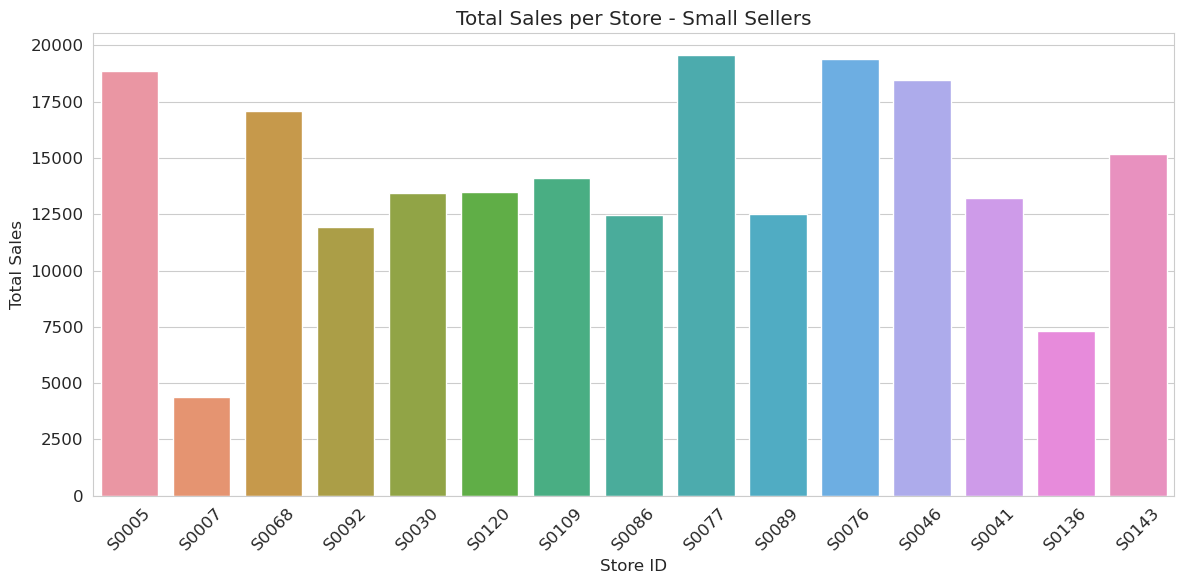

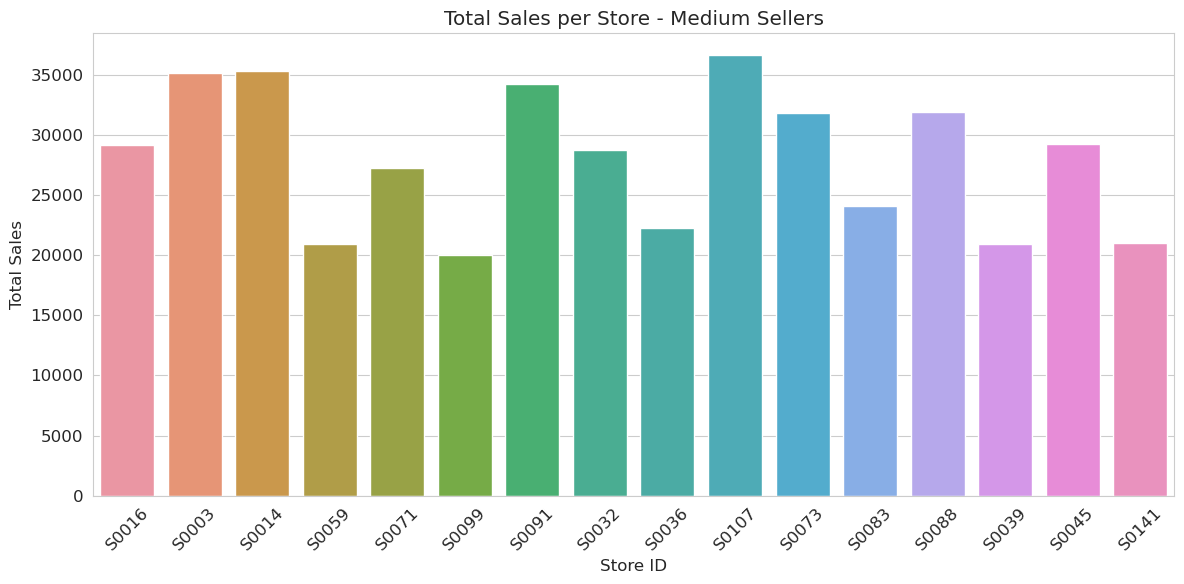

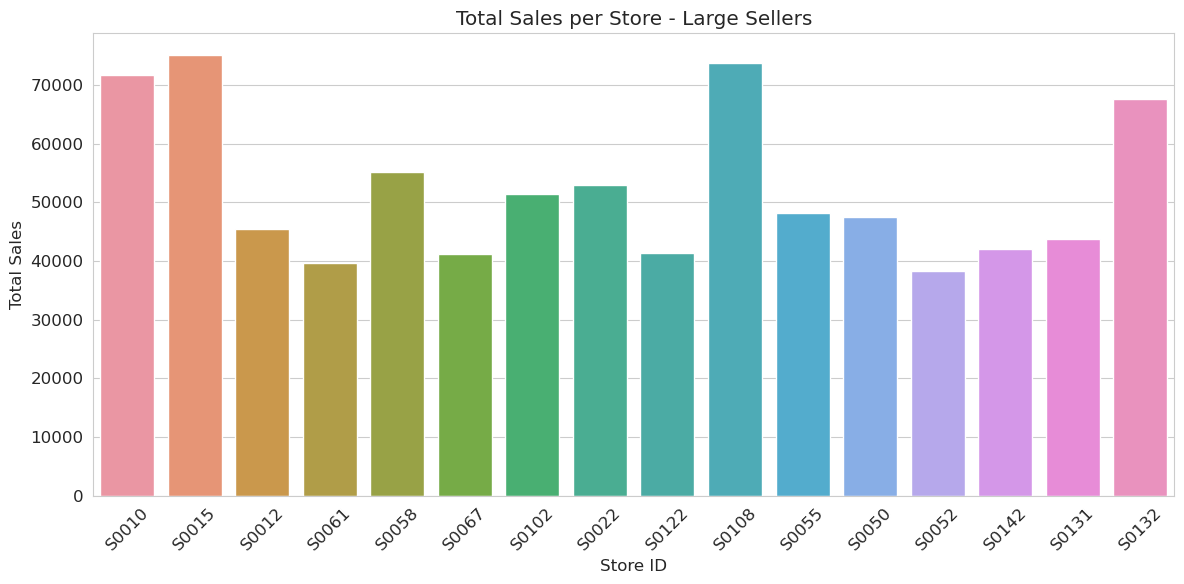

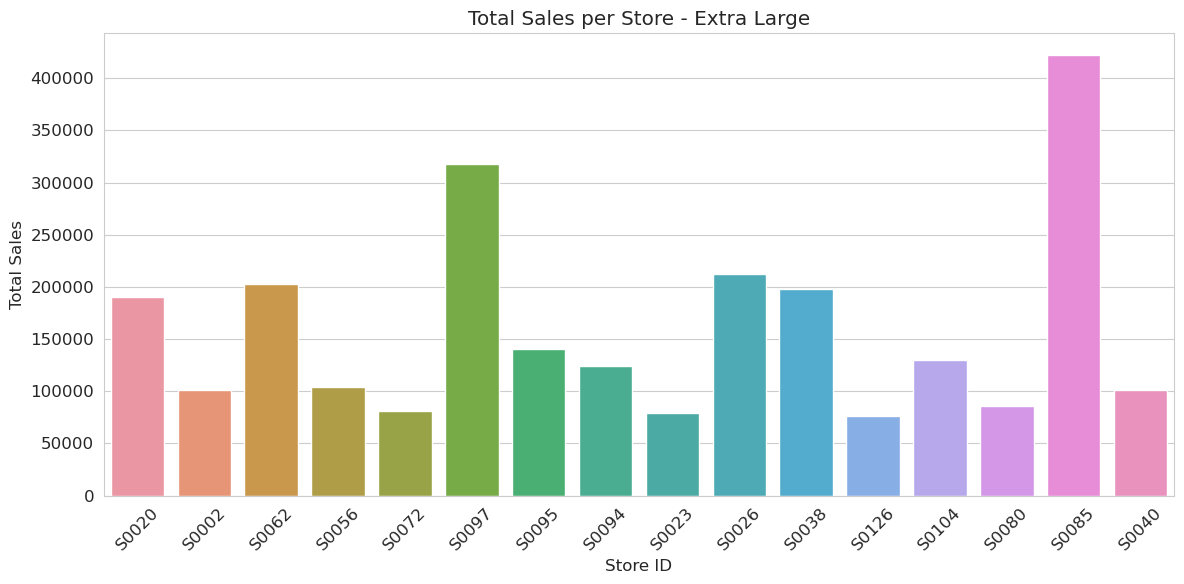

In [25]:
# Convert to pandas for plotting
stores_with_size_pd = stores_with_size.toPandas()

# Plotting: one barplot per size group
# Note: Using the exact group names from your F.when conditions
groups = ['Small Sellers', 'Medium Sellers', 'Large Sellers', 'Extra Large']

for group in groups:
    df_group = stores_with_size_pd[stores_with_size_pd['size_group'] == group]
    # Total Sales per Store
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_group, x='store_id', y='total_sales')
    plt.title(f'Total Sales per Store - {group}')
    plt.xlabel('Store ID')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## **Figuring out difference between revenue and (price*sales)**

In [26]:
%%sql
SELECT * FROM Raw_data.product.raw_data WHERE product_id = "P0015" limit 100

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 28, Finished, Available, Finished)

<Spark SQL result set with 1 rows and 10 fields>

In [27]:
%%sql
SELECT * FROM Raw_data.sales.raw_data limit 100

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 29, Finished, Available, Finished)

<Spark SQL result set with 100 rows and 14 fields>

In [28]:
%%sql
WITH sales_table as (
SELECT
    store_id,
    product_id,
    date,
    sales,
    revenue,
    stock,
    price,
    round((price * sales),2) AS total_sales,
    round(((price * sales) - revenue),2) AS diff_between_rev_n_total_price,
    ROUND((((price * sales) - revenue) / (price * sales) * 100),2) AS discount_percentage, 
    promo_type_1,
    promo_type_2
FROM Raw_data.sales.raw_data
WHERE sales > 0 and promo_type_1 = "PR14" and store_id = "S0002" and product_id = "P0437"
LIMIT 1000)
SELECT DISTINCT(discount_percentage), count(*) as number_of_records, sales, promo_type_1, promo_type_2 FROM sales_table GROUP BY discount_percentage, sales,promo_type_1, promo_type_2

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 30, Finished, Available, Finished)

<Spark SQL result set with 7 rows and 5 fields>

In [4]:
%%sql
SELECT
    store_id,
    product_id,
    date,
    sales,
    revenue,
    stock,
    price,
    round((price * sales),2) AS total_sales,
    round(((price * sales) - revenue),2) AS diff_between_rev_n_total_price,
    ROUND((((price * sales) - revenue) / (price * sales) * 100),2) AS discount_percentage, 
    promo_type_1,
    promo_type_2
FROM Raw_data.sales.raw_data
WHERE sales > 0 and promo_type_1 = "PR10" and product_id = "P0689" AND store_id = "S0002" and sales = "1"
LIMIT 1000

StatementMeta(, f8065297-78af-48db-ab27-e22a4b8d7549, 5, Finished, Available, Finished)

<Spark SQL result set with 24 rows and 12 fields>

## **Finding what the minimum weeks of history is needed based on current data**

In [30]:
from pyspark.sql.functions import col, to_date, datediff, countDistinct, min as spark_min, max as spark_max, when

# Read sales data directly from the Bronze layer via Spark SQL
df_sales_spark = spark.sql("SELECT * FROM Raw_data.sales.raw_data")

# --- Data Preprocessing: Cast necessary columns to appropriate types ---
# Convert 'date' string to a date type. Assuming format 'YYYY-MM-DD'.
# Adjust the format string if your date string is in a different format (e.g., 'MM/dd/yyyy').
df_sales_spark = df_sales_spark.withColumn("date", to_date(col("date"), "yyyy-MM-dd"))

# Convert 'sales' string to an integer type.
df_sales_spark = df_sales_spark.withColumn("sales_numeric", col("sales").cast("integer"))


# --- 1. Calculate the number of distinct date entries for each product_id-store_id pair ---
distinct_dates_count_spark = df_sales_spark.groupBy("product_id", "store_id").agg(
    countDistinct("date").alias("distinct_date_count")
)
print("Distinct Date Entries per Product-Store Pair (Spark DataFrame):")
distinct_dates_count_spark.show(5) # Show first 5 rows to see the structure

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 32, Finished, Available, Finished)

Distinct Date Entries per Product-Store Pair (Spark DataFrame):
+----------+--------+-------------------+
|product_id|store_id|distinct_date_count|
+----------+--------+-------------------+
|     P0212|   S0002|               1027|
|     P0132|   S0012|                378|
|     P0572|   S0015|                987|
|     P0210|   S0016|                179|
|     P0591|   S0020|               1033|
+----------+--------+-------------------+
only showing top 5 rows



In [31]:
# --- 2. Calculate the time span (max date - min date) for each product_id-store_id pair ---
time_span_spark = df_sales_spark.groupBy("product_id", "store_id").agg(
    spark_min("date").alias("min_date"),
    spark_max("date").alias("max_date")
)
# Calculate the difference in days between max and min date
time_span_spark = time_span_spark.withColumn("time_span_days", datediff(col("max_date"), col("min_date")))
time_span_spark = time_span_spark.select("product_id", "store_id", "time_span_days") # Select only relevant columns
print("\nTime Span (in days) per Product-Store Pair (Spark DataFrame):")
time_span_spark.show(5)

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 33, Finished, Available, Finished)


Time Span (in days) per Product-Store Pair (Spark DataFrame):
+----------+--------+--------------+
|product_id|store_id|time_span_days|
+----------+--------+--------------+
|     P0212|   S0002|          1032|
|     P0132|   S0012|           775|
|     P0572|   S0015|          1032|
|     P0210|   S0016|           178|
|     P0591|   S0020|          1032|
+----------+--------+--------------+
only showing top 5 rows



In [32]:
# --- 3. Calculate the number of non-zero sales days for each product_id-store_id pair ---
# Filter for sales greater than 0, then count distinct dates
non_zero_sales_days_spark = df_sales_spark.filter(col("sales_numeric") > 0).groupBy("product_id", "store_id").agg(
    countDistinct("date").alias("non_zero_sales_days_count")
)
print("\nNon-Zero Sales Days per Product-Store Pair (Spark DataFrame):")
non_zero_sales_days_spark.show(5)

# --- Combine all these into a single Spark DataFrame ---
# Start with distinct_dates_count
combined_history_metrics_spark = distinct_dates_count_spark

# Join with time_span
combined_history_metrics_spark = combined_history_metrics_spark.join(
    time_span_spark,
    on=["product_id", "store_id"],
    how="left"
)

# Join with non_zero_sales_days. Use 'left' join to keep all product-store pairs
# and fill 'null' (where no non-zero sales occurred) with 0.
combined_history_metrics_spark = combined_history_metrics_spark.join(
    non_zero_sales_days_spark,
    on=["product_id", "store_id"],
    how="left"
).fillna({"non_zero_sales_days_count": 0}) # Fill NaN (nulls in Spark) with 0

print("\nCombined History Metrics (Spark DataFrame):")
combined_history_metrics_spark.show(5)

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 34, Finished, Available, Finished)


Non-Zero Sales Days per Product-Store Pair (Spark DataFrame):
+----------+--------+-------------------------+
|product_id|store_id|non_zero_sales_days_count|
+----------+--------+-------------------------+
|     P0572|   S0015|                      285|
|     P0431|   S0020|                      273|
|     P0212|   S0002|                      115|
|     P0591|   S0020|                       10|
|     P0132|   S0012|                       26|
+----------+--------+-------------------------+
only showing top 5 rows


Combined History Metrics (Spark DataFrame):
+----------+--------+-------------------+--------------+-------------------------+
|product_id|store_id|distinct_date_count|time_span_days|non_zero_sales_days_count|
+----------+--------+-------------------+--------------+-------------------------+
|     P0132|   S0012|                378|           775|                       26|
|     P0210|   S0016|                179|           178|                       12|
|     P0212|   S0002

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 35, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency (Product-Store Pairs)')

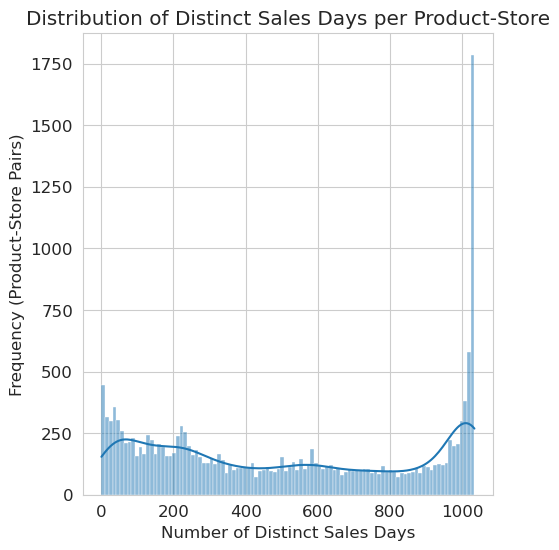

In [33]:
combined_history_metrics_pandas = combined_history_metrics_spark.toPandas()

# Set a style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(18, 6)) # Adjust figure size for all subplots

# --- Plot 1: Distribution of Distinct Date Count ---
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.histplot(combined_history_metrics_pandas['distinct_date_count'],bins=100, kde=True)
plt.title('Distribution of Distinct Sales Days per Product-Store')
plt.xlabel('Number of Distinct Sales Days')
plt.ylabel('Frequency (Product-Store Pairs)')



StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 36, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency (Product-Store Pairs)')

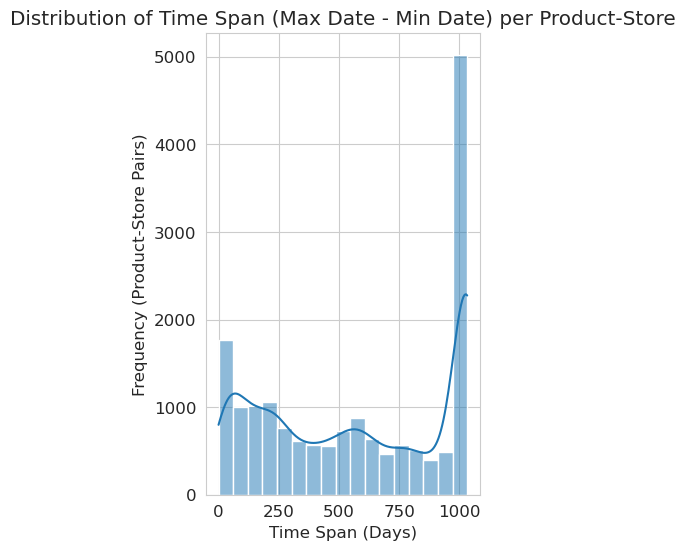

In [34]:
# --- Plot 2: Distribution of Time Span (in days) ---
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.histplot(combined_history_metrics_pandas['time_span_days'], kde=True)
plt.title('Distribution of Time Span (Max Date - Min Date) per Product-Store')
plt.xlabel('Time Span (Days)')
plt.ylabel('Frequency (Product-Store Pairs)')

StatementMeta(, acb31515-9732-45c1-8b51-ae22a6665d1e, 38, Finished, Available, Finished)

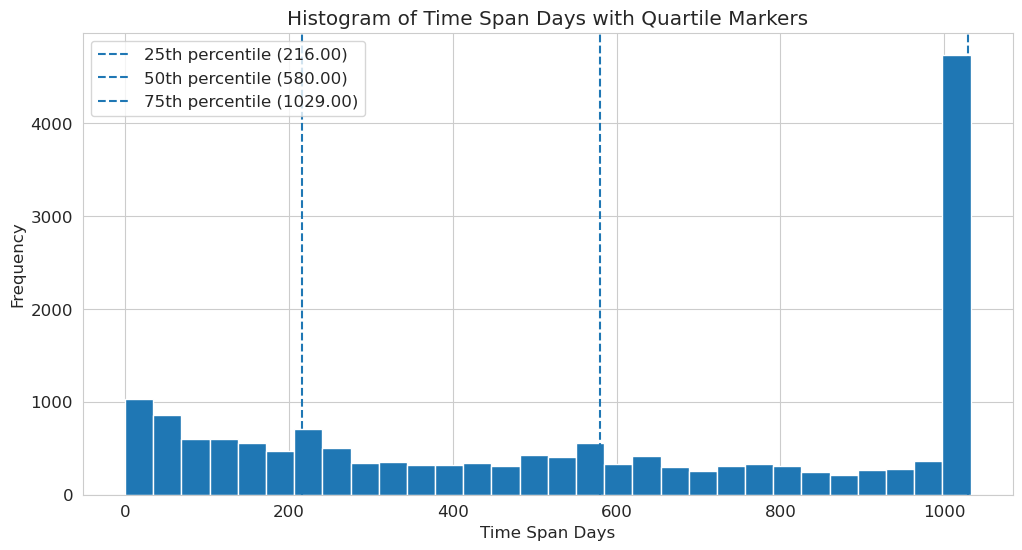

In [36]:
q1, q2, q3 = combined_history_metrics_pandas['time_span_days'].quantile([0.25, 0.5, 0.75])

# 3) Plot
data = combined_history_metrics_pandas['time_span_days'].dropna()
plt.figure()
plt.hist(data, bins=30)
for q, label in zip([q1, q2, q3], ['25th', '50th', '75th']):
    plt.axvline(q, linestyle='--', label=f"{label} percentile ({q:.2f})")
plt.xlabel('Time Span Days')
plt.ylabel('Frequency')
plt.title('Histogram of Time Span Days with Quartile Markers')
plt.legend()
plt.show()

StatementMeta(, 33a15ce6-1a3d-456c-951e-3a17330ccb62, 93, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


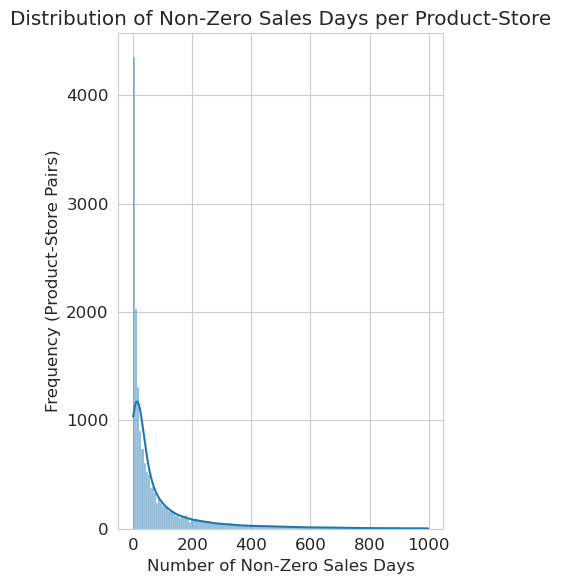

In [92]:
# --- Plot 3: Distribution of Non-Zero Sales Days Count ---
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.histplot(combined_history_metrics_pandas['non_zero_sales_days_count'], kde=True)
plt.title('Distribution of Non-Zero Sales Days per Product-Store')
plt.xlabel('Number of Non-Zero Sales Days')
plt.ylabel('Frequency (Product-Store Pairs)')

plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

StatementMeta(, 33a15ce6-1a3d-456c-951e-3a17330ccb62, 91, Finished, Available, Finished)

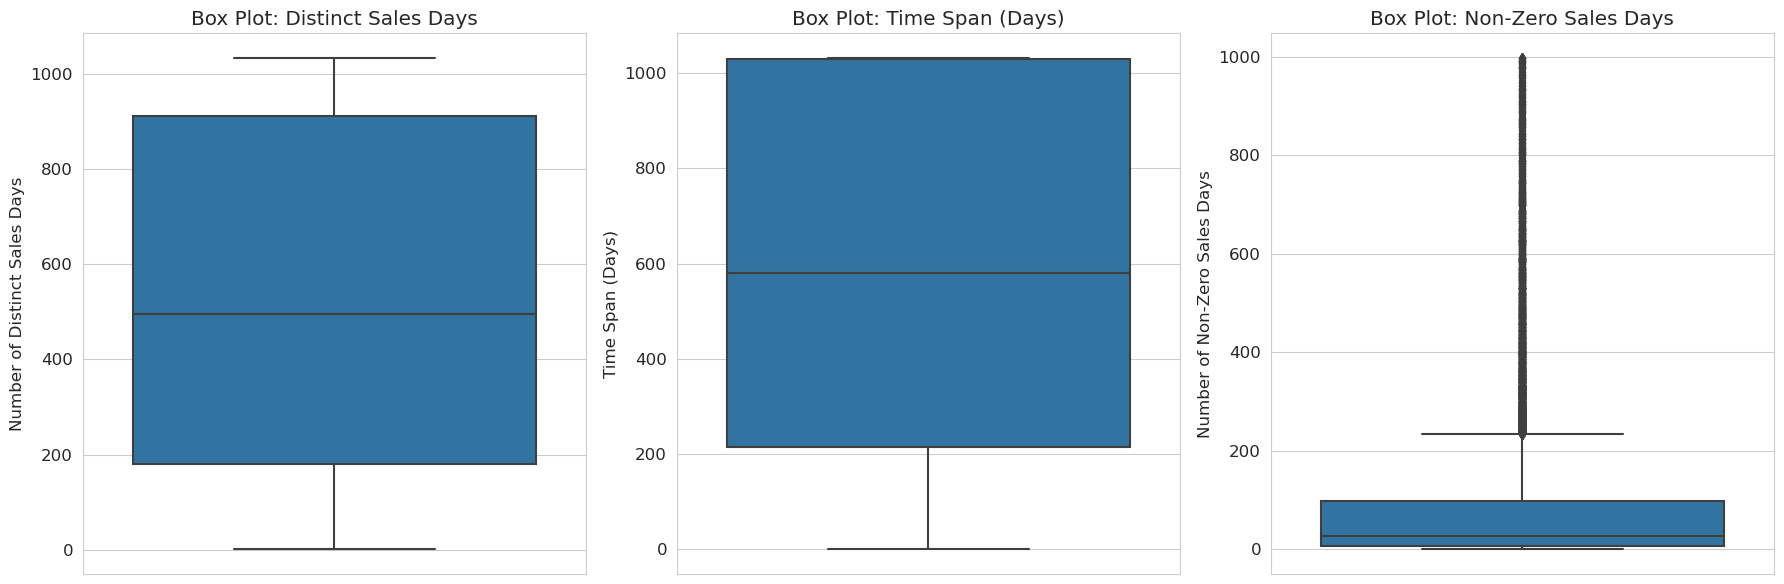

In [90]:
# --- Plot 4: Box plots to see outliers and quartiles more clearly ---
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=combined_history_metrics_pandas['distinct_date_count'])
plt.title('Box Plot: Distinct Sales Days')
plt.ylabel('Number of Distinct Sales Days')

plt.subplot(1, 3, 2)
sns.boxplot(y=combined_history_metrics_pandas['time_span_days'])
plt.title('Box Plot: Time Span (Days)')
plt.ylabel('Time Span (Days)')

plt.subplot(1, 3, 3)
sns.boxplot(y=combined_history_metrics_pandas['non_zero_sales_days_count'])
plt.title('Box Plot: Non-Zero Sales Days')
plt.ylabel('Number of Non-Zero Sales Days')

plt.tight_layout()
plt.show()

In [101]:
# Define the minimum number of days for 52 weeks
MIN_DAYS_FOR_52_WEEKS = 52 * 7

# Filter for products with time span greater than or equal to 52 weeks
products_with_sufficient_history = combined_history_metrics_spark.filter(
    col("time_span_days") >= MIN_DAYS_FOR_52_WEEKS
)

# Group by store_id and count distinct products with sufficient history
num_products_52_weeks_per_store = products_with_sufficient_history.groupBy("store_id").agg(
    countDistinct("product_id").alias("num_products_with_52_weeks_plus")
)

print(f"Initial: Number of products with {52} weeks or more of data per store:")
num_products_52_weeks_per_store.show()

# --- Add new columns: total products and products with insufficient history ---

# Calculate the total number of unique products per store
total_products_in_store = combined_history_metrics_spark.groupBy("store_id").agg(
    countDistinct("product_id").alias("total_products_in_store")
)

# Calculate the number of products with LESS THAN 52 weeks of data per store
products_with_insufficient_history = combined_history_metrics_spark.filter(
    col("time_span_days") < MIN_DAYS_FOR_52_WEEKS
)

num_products_less_than_52_weeks_per_store = products_with_insufficient_history.groupBy("store_id").agg(
    countDistinct("product_id").alias("num_products_less_than_52_weeks")
)

# Join all these aggregated DataFrames together
# Start with the DataFrame containing products with 52+ weeks
final_store_product_history_summary = num_products_52_weeks_per_store

# Left join with total products per store
final_store_product_history_summary = final_store_product_history_summary.join(
    total_products_in_store,
    on="store_id",
    how="left"
)

# Left join with products having less than 52 weeks history
final_store_product_history_summary = final_store_product_history_summary.join(
    num_products_less_than_52_weeks_per_store,
    on="store_id",
    how="left"
)

# Fill any null values that might appear if a store has 0 products in a specific category
# (e.g., a store might have no products with less than 52 weeks of history)
final_store_product_history_summary = final_store_product_history_summary.fillna(
    0, subset=["num_products_with_52_weeks_plus", "num_products_less_than_52_weeks", "total_products_in_store"]
)

# Display the final aggregated DataFrame
print("\nFinal Store-Level Product History Summary (with totals and insufficient history counts):")
final_store_product_history_summary.show(70)

StatementMeta(, 33a15ce6-1a3d-456c-951e-3a17330ccb62, 102, Finished, Available, Finished)

Initial: Number of products with 52 weeks or more of data per store:
+--------+-------------------------------+
|store_id|num_products_with_52_weeks_plus|
+--------+-------------------------------+
|   S0010|                            158|
|   S0030|                             73|
|   S0120|                             77|
|   S0086|                             72|
|   S0142|                            251|
|   S0077|                             70|
|   S0046|                            113|
|   S0023|                            294|
|   S0073|                            139|
|   S0126|                            291|
|   S0107|                            163|
|   S0026|                            326|
|   S0041|                             40|
|   S0038|                            393|
|   S0055|                            233|
|   S0141|                             72|
|   S0015|                            167|
|   S0032|                             81|
|   S0059|                  

In [102]:
from pyspark.sql.functions import col, lit # Ensure 'lit' is imported here

# --- Part 2: Number of weeks of data each product has in each store ---

# Add a 'num_weeks_data' column to the combined metrics DataFrame
df_product_weeks_per_store = combined_history_metrics_spark.withColumn(
    "num_weeks_data", col("time_span_days") / lit(7)
).select("store_id", "product_id", "num_weeks_data")

print("\nNumber of weeks of data per product in each store (displaying first 5 products for a few example stores):")

# Collect unique store_ids to iterate. Be cautious if you have a very large number of stores.
store_ids_list = df_product_weeks_per_store.select("store_id").distinct().limit(5).collect() # Limiting to 5 for example

# Display a separate DataFrame for each store (showing top 5 products as example)
for row in store_ids_list:
    store_id = row.store_id
    print(f"\n--- Data for Store ID: {store_id} ---")
    df_product_weeks_per_store.filter(col("store_id") == store_id).show(5)

StatementMeta(, 33a15ce6-1a3d-456c-951e-3a17330ccb62, 103, Finished, Available, Finished)


Number of weeks of data per product in each store (displaying first 5 products for a few example stores):

--- Data for Store ID: S0010 ---
+--------+----------+------------------+
|store_id|product_id|    num_weeks_data|
+--------+----------+------------------+
|   S0010|     P0042| 95.71428571428571|
|   S0010|     P0590|147.42857142857142|
|   S0010|     P0680|33.714285714285715|
|   S0010|     P0035|             147.0|
|   S0010|     P0103|147.42857142857142|
+--------+----------+------------------+
only showing top 5 rows


--- Data for Store ID: S0015 ---
+--------+----------+------------------+
|store_id|product_id|    num_weeks_data|
+--------+----------+------------------+
|   S0015|     P0572|147.42857142857142|
|   S0015|     P0506|147.42857142857142|
|   S0015|     P0185|147.42857142857142|
|   S0015|     P0227|133.85714285714286|
|   S0015|     P0116|142.71428571428572|
+--------+----------+------------------+
only showing top 5 rows


--- Data for Store ID: S0016 ---
+--

In [3]:
%%sql
SELECT*
FROM Raw_data.sales.raw_data
WHERE product_id = "P0267" and store_id = "S0040"
ORDER BY date DESC

StatementMeta(, be4bf453-4bca-41d2-b0ed-f7a219149a4f, 4, Finished, Available, Finished)

<Spark SQL result set with 309 rows and 14 fields>

In [5]:
%%sql
SELECT MIN(DATE) as data_min,
       MAX(DATE) as data_max
FROM Raw_data.sales.raw_data


StatementMeta(, f8065297-78af-48db-ab27-e22a4b8d7549, 6, Finished, Available, Finished)

<Spark SQL result set with 1 rows and 2 fields>